In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# any subsequent matplotlib plots will be displayed directly below the code cell that generated them.
import plotly.graph_objs as go # interactive plots: scatter plots, line plots, bar charts, etc.
import plotly.figure_factory as ff # complex figures and visualizations: histograms, heatmaps, and tables.
from plotly import tools # creating subplots, combining multiple plots into a single figure, and customizing plot layouts.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
# download_plotlyjs plots to HTML files for offline viewing
# init_notebook_mode # enables Plotly's interactive features
# plot to create and display Plotly plots in an offline environment. It generates standalone HTML files containing the plot and opens them in the default web browser.
# iplot is similar to plot, but it is specifically designed for use within Jupyter Notebooks. It displays Plotly plots directly in the notebook output cell.
# init_notebook_mode(connected = True) to communicate with the notebook interface for interactivity, such as zooming, panning, and hovering over data points to see tooltips.

import gc # garbage collector. Garbage collection is a process by which Python automatically reclaims memory that is no longer in use by the program, freeing it up for other purposes.
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # k-fold cross-validation, which is a technique for assessing the performance of a machine learning model. In k-fold cross-validation, the original dataset is divided into k subsets, called folds. The model is trained on k-1 folds and evaluated on the remaining fold. This process is repeated k times, with each fold serving as the test set exactly once. The results from each iteration are then averaged to obtain a final performance metric.
from sklearn.metrics import roc_auc_score # Receiver Operating Characteristic Area Under the Curve (ROC AUC) score, which is a common metric used to evaluate the performance of binary classification models. In binary classification, ROC AUC measures the ability of a model to distinguish between the positive and negative classes by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The ROC AUC score ranges from 0 to 1, where a score closer to 1 indicates better performance, with a score of 0.5 representing random guessing.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier # AdaBoost (Adaptive Boosting) algorithm for classification tasks. AdaBoost is an ensemble learning method that combines multiple weak learners (base classifiers), such as decision trees or perceptrons, to create a strong learner that can make accurate predictions. The AdaBoost algorithm works by sequentially training a series of weak learners on the same dataset, with each subsequent learner focusing more on the examples that were misclassified by the previous learners. The final prediction is made by taking a weighted sum of the predictions from all the weak learners.
!pip install catboost
!pip install lightgbm==3.3.0
from catboost import CatBoostClassifier # CatBoost is a machine learning library specifically designed for gradient boosting on decision trees. It is particularly well-suited for handling categorical features in tabular datasets and is known for its high performance and ease of use. The CatBoostClassifier class is used for classification tasks and is one of the main components of the CatBoost library. It implements a gradient boosting classifier algorithm that can handle both numerical and categorical features efficiently.
from sklearn import svm # SVM is a supervised learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that separates the classes in the feature space, maximizing the margin between the classes. SVM can be applied to both linear and non-linear classification problems through the use of different kernel functions. svm.SVC: This class implements the Support Vector Classification (SVC) algorithm for classification tasks. svm.SVR: This class implements the Support Vector Regression (SVR) algorithm for regression tasks.
import lightgbm as lgb # a gradient boosting framework that is designed for distributed and efficient training of large-scale datasets. It is known for its high speed, low memory usage, and high accuracy. LightGBM supports both classification and regression tasks and is widely used in machine learning competitions and industry applications. lgb.LGBMClassifier: This class implements the LightGBM model for classification tasks. lgb.LGBMRegressor: This class implements the LightGBM model for regression tasks. Functions for parameter tuning, cross-validation, and feature importance analysis. Support for handling categorical features and custom objective functions.
from lightgbm import LGBMClassifier # LightGBM is a gradient boosting framework that is designed for distributed and efficient training of large-scale datasets. It is known for its high speed, low memory usage, and high accuracy. LightGBM supports both classification and regression tasks and is widely used in machine learning competitions and industry applications.
import xgboost as xgb # XGBoost (eXtreme Gradient Boosting) is an efficient and scalable implementation of gradient boosting machines, which is a popular machine learning algorithm for classification and regression tasks. XGBoost is known for its speed, performance, and ability to handle large-scale datasets.xgb.XGBClassifier: This class implements the XGBoost model for classification tasks. xgb.XGBRegressor: This class implements the XGBoost model for regression tasks. Functions for parameter tuning, cross-validation, and feature importance analysis. Support for handling missing values, early stopping, and custom objective functions.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [3]:
pd.set_option('display.max_columns', 100)
RFC_METRIC = 'gini' # RFC means Random Forest Classifier. Gini impurity criterion, which measures the impurity or homogeneity of a set of samples. Alternative options for this parameter include 'entropy', which measures information gain, or 'mse' for mean squared error.
NUM_ESTIMATORS = 100 # number of decision trees (estimators) to be included in the random forest ensemble. Increasing the number of estimators can improve the performance of the model, but it also increases the computational cost.
NO_JOBS = 4 # number of jobs or CPU cores to use for parallel processing during training.
VALID_SIZE = 0.2
TEST_SIZE = 0.2

NUMBER_KFOLDS = 5

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 # the maximum number of boosting rounds or iterations during the training process. Boosting algorithms like XGBoost and LightGBM train an ensemble of weak learners sequentially, with each iteration adding a new weak learner to improve the model's performance. Setting a maximum number of rounds helps prevent overfitting and controls the complexity of the model.
EARLY_STOP = 50 # number of rounds for early stopping criteria. Early stopping is a technique used to prevent overfitting by monitoring the model's performance on a validation dataset during training. If the performance does not improve for a certain number of consecutive rounds (defined by EARLY_STOP), training is halted, and the model with the best performance on the validation dataset is selected.
OPT_ROUNDS = 1000 # number of rounds for early stopping criteria. Early stopping is a technique used to prevent overfitting by monitoring the model's performance on a validation dataset during training. If the performance does not improve for a certain number of consecutive rounds (defined by EARLY_STOP), training is halted, and the model with the best performance on the validation dataset is selected.
VERBOSE_EVAL = 50 # verbosity of the evaluation process during training. It specifies the frequency at which evaluation metrics are printed to the console or logged during training. Setting VERBOSE_EVAL to 50 means that evaluation metrics will be printed every 50 boosting rounds.

import os # a way of using operating system dependent functionality.

In [4]:
df = pd.read_csv("/content/creditcard.csv")

In [5]:
print('Number of rows:', df.shape[0], 'Number of columns:', df.shape[1])

Number of rows: 284807 Number of columns: 31


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis =1, keys = ['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


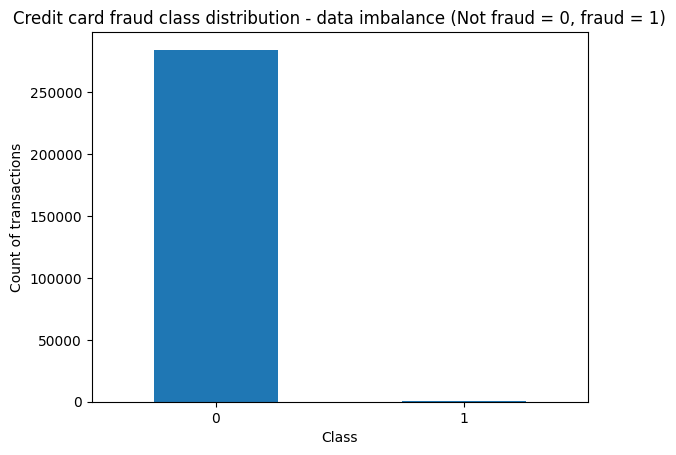

In [9]:
df['Class'].value_counts(sort=False).plot.bar(rot=0)
plt.xlabel('Class')
plt.ylabel('Count of transactions')
plt.title('Credit card fraud class distribution - data imbalance (Not fraud = 0, fraud = 1)')
plt.show()

<Axes: xlabel='Time', ylabel='Density'>

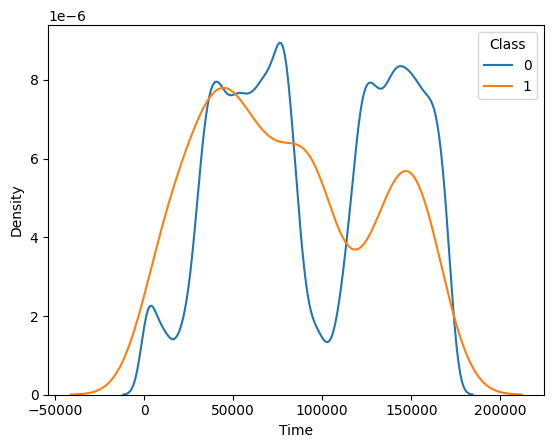

In [10]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]
hist_data = [class_0, class_1]

sns.kdeplot(data=df, x=class_0, hue=df["Class"])
sns.kdeplot(data=df, x=class_1, hue=df["Class"])

In [11]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x/3600))
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_1 = pd.DataFrame(tmp)
df_1.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_1.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


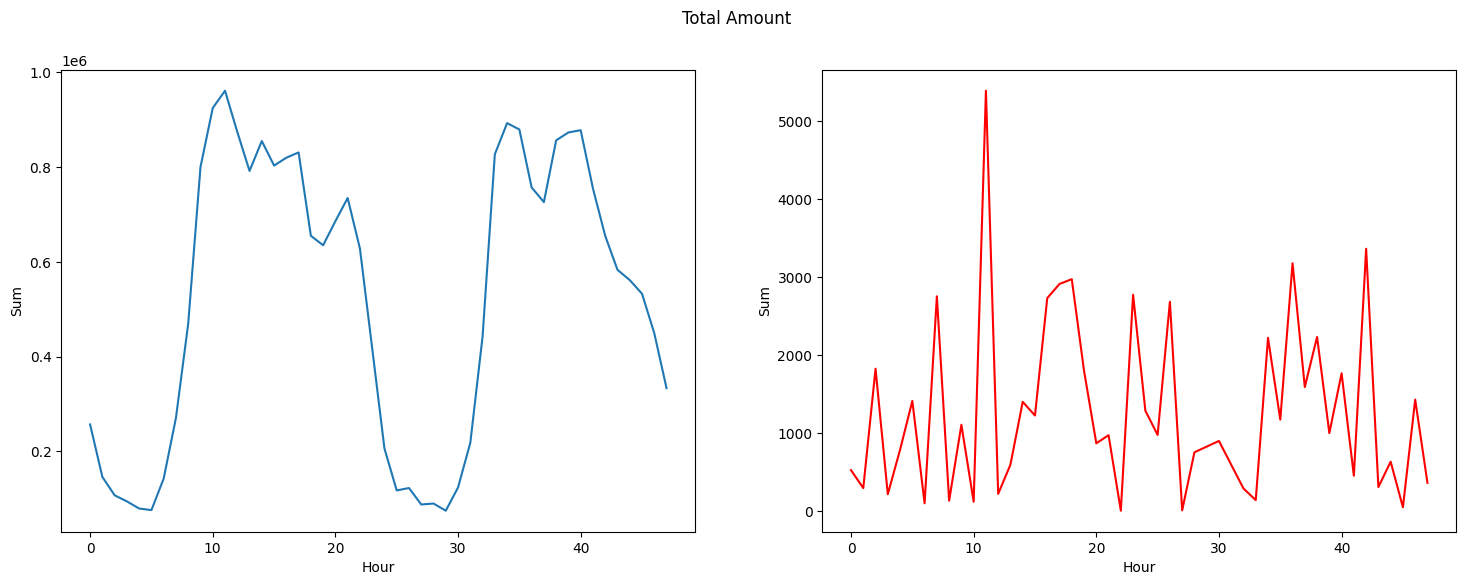

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x = 'Hour', y = 'Sum', data = df_1.loc[df_1.Class==0])
s = sns.lineplot(ax = ax2, x = 'Hour', y = 'Sum', data = df_1.loc[df_1.Class==1], color = 'red')
plt.suptitle('Total Amount') # super title (main title)
plt.show()

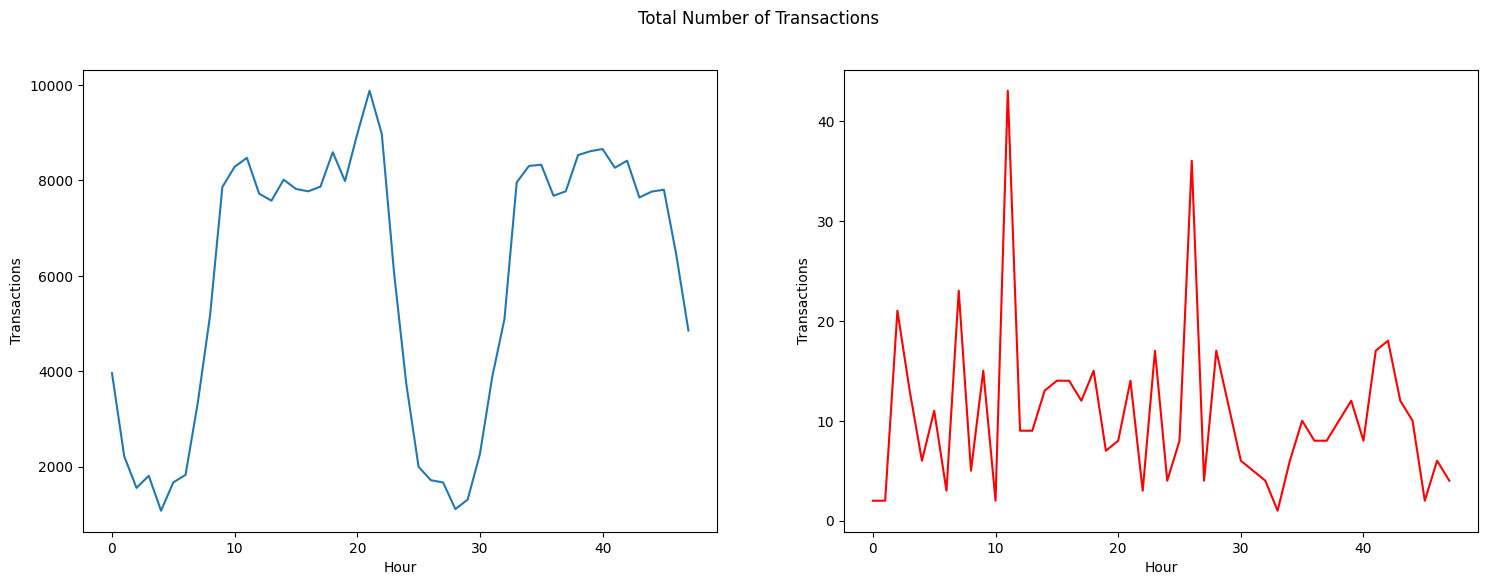

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6)) # fig is a reference to the entire figure object, while ax1 and ax2 are references to the two subplot axes created.
s = sns.lineplot(ax=ax1, x = 'Hour', y = 'Transactions', data = df_1.loc[df_1.Class == 0])
s = sns.lineplot(ax=ax2, x = 'Hour', y = 'Transactions', data = df_1.loc[df_1.Class == 1], color='red')
plt.suptitle('Total Number of Transactions')
plt.show()

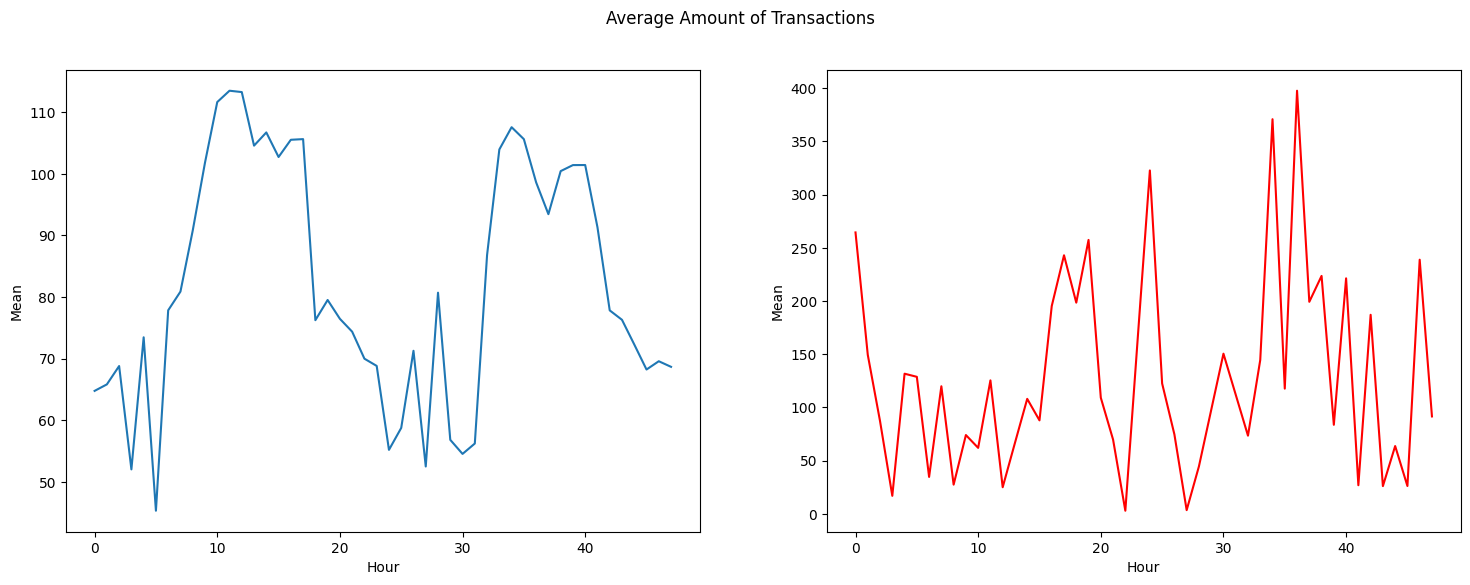

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,6))
s = sns.lineplot(ax = ax1, x = 'Hour', y = 'Mean', data = df_1.loc[df_1.Class == 0])
s = sns.lineplot(ax = ax2, x = 'Hour', y = 'Mean', data = df_1.loc[df_1.Class == 1], color = 'red')
plt.suptitle('Average Amount of Transactions')
plt.show()

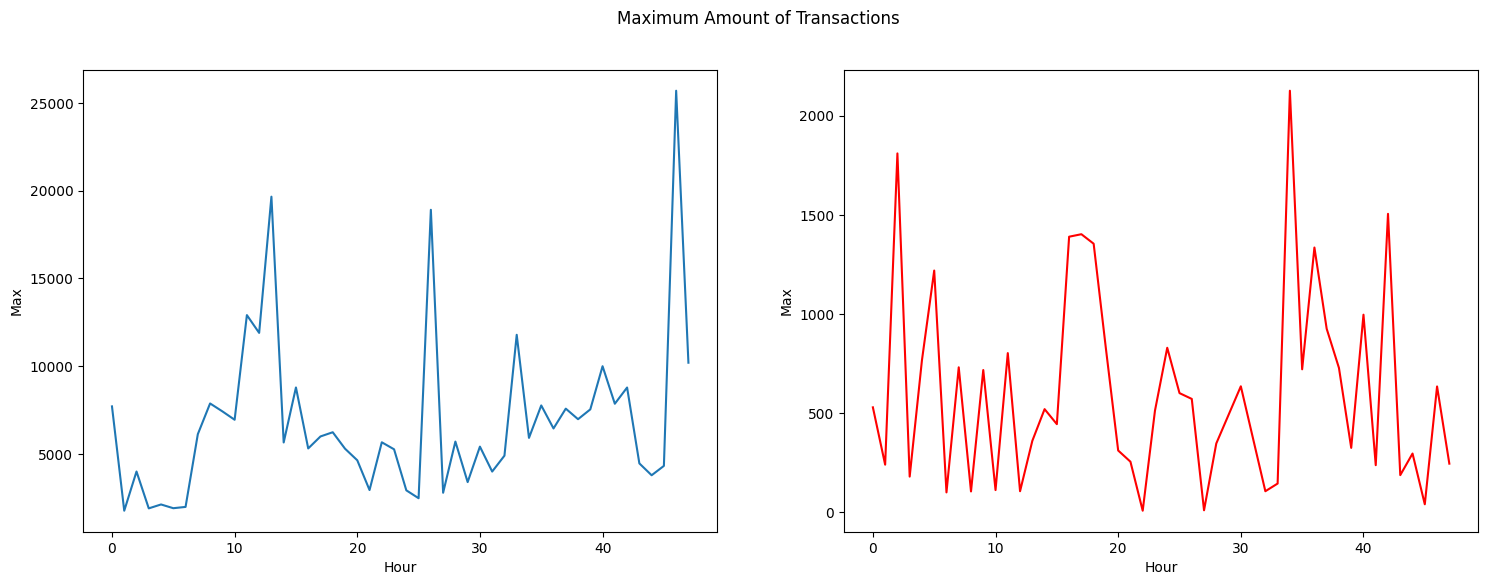

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,6))
s = sns.lineplot(ax = ax1, x = 'Hour', y = 'Max', data = df_1.loc[df_1.Class == 0]) # selecting data from the DataFrame df_1 where the 'Class' column has a value of 0. This means that the line plot will be generated using only the data where the 'Class' column equals 0.
s = sns.lineplot(ax = ax2, x = 'Hour', y = 'Max', data = df_1.loc[df_1.Class == 1], color = 'red')
plt.suptitle('Maximum Amount of Transactions')
plt.show()

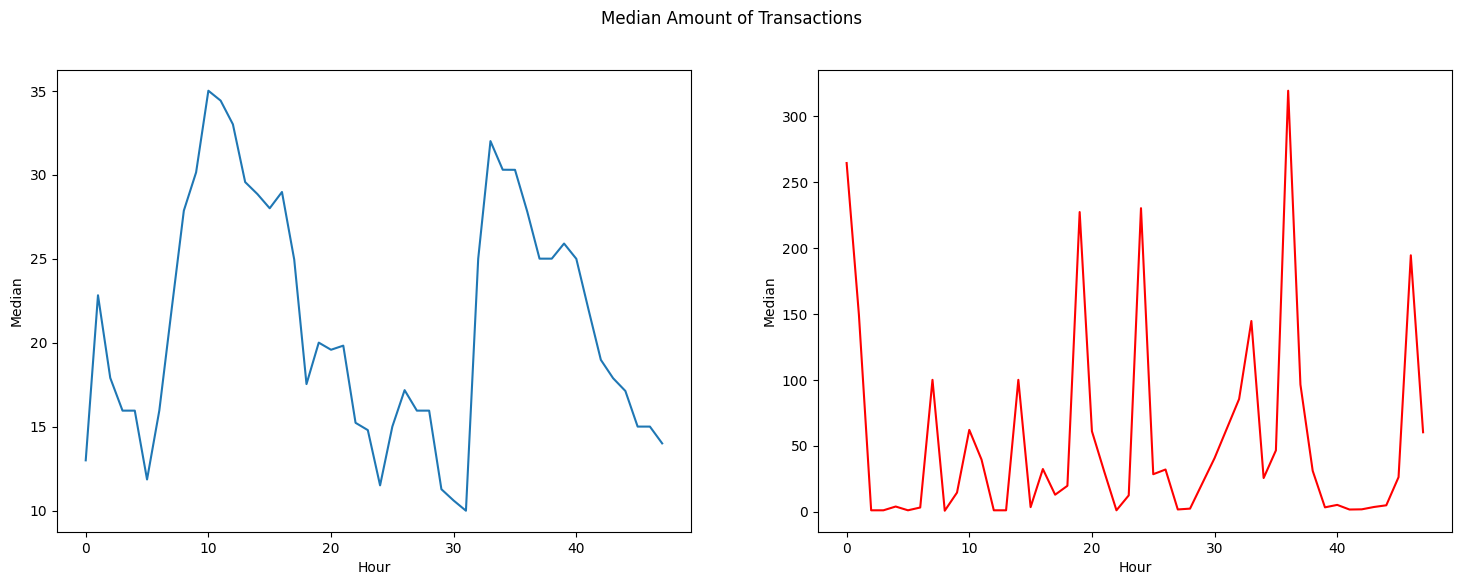

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,6))
s = sns.lineplot(ax = ax1, x = 'Hour', y = 'Median', data = df_1.loc[df_1.Class == 0])
s = sns.lineplot(ax = ax2, x = 'Hour', y = 'Median', data = df_1.loc[df_1.Class == 1], color ='red')
plt.suptitle('Median Amount of Transactions')
plt.show()

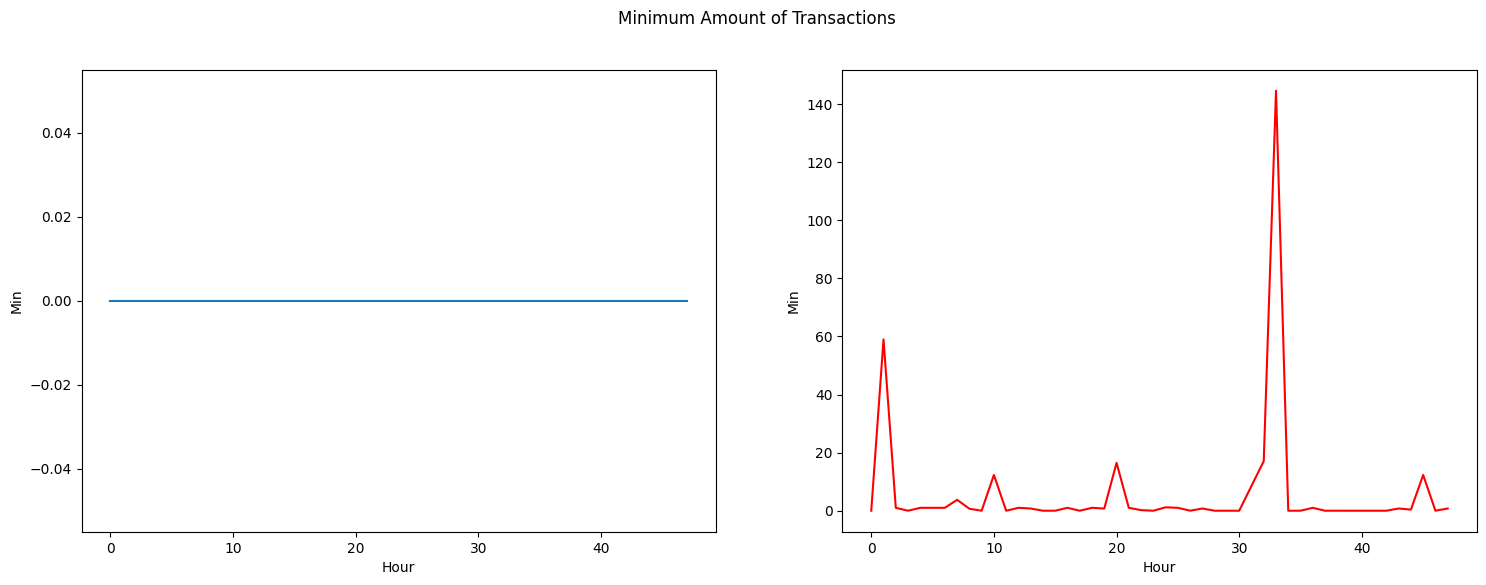

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18, 6))
s = sns.lineplot(ax = ax1, x = 'Hour', y = 'Min', data = df_1.loc[df_1.Class == 0])
s = sns.lineplot(ax = ax2, x = 'Hour', y = 'Min', data = df_1.loc[df_1.Class == 1], color = 'red')
plt.suptitle('Minimum Amount of Transactions')
plt.show()

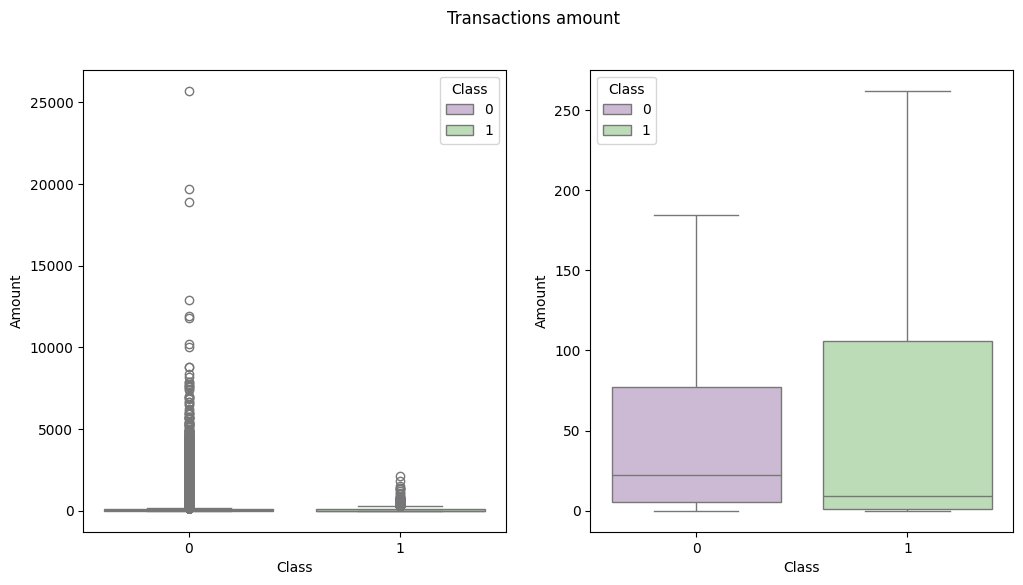

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,6))
s = sns.boxplot(ax = ax1, x = 'Class', y = 'Amount', hue = 'Class', data = df, palette = 'PRGn', showfliers = True)
s = sns.boxplot(ax = ax2, x = 'Class', y = 'Amount', hue = 'Class', data = df, palette = 'PRGn', showfliers = False)
plt.suptitle('Transactions amount')
plt.show()

In [19]:
tmp = df[['Amount', 'Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

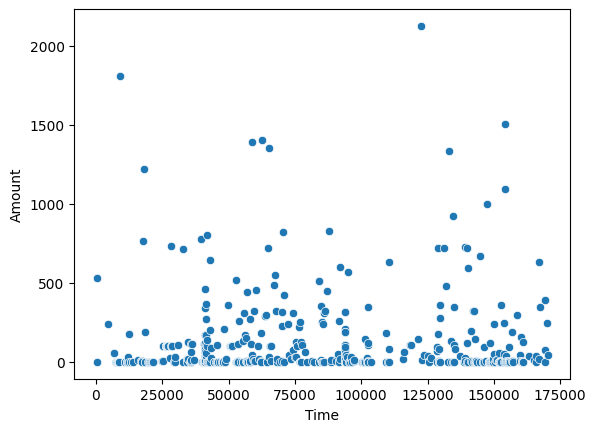

In [21]:
fraud = df.loc[df['Class']==1]
trace = sns.scatterplot(x = fraud['Time'], y = fraud['Amount'])
data = [trace]
layout = dict(title = 'Amount of fradulent transactions',
              xaxis = dict(title = 'Time[s]', showticklabels=True), yaxis = dict(title = 'Amount'),
              hovermode= 'closest') # 'closest' means that the hover label will be shown for the data point closest to the cursor.
fig = dict(data = data, layout = layout)

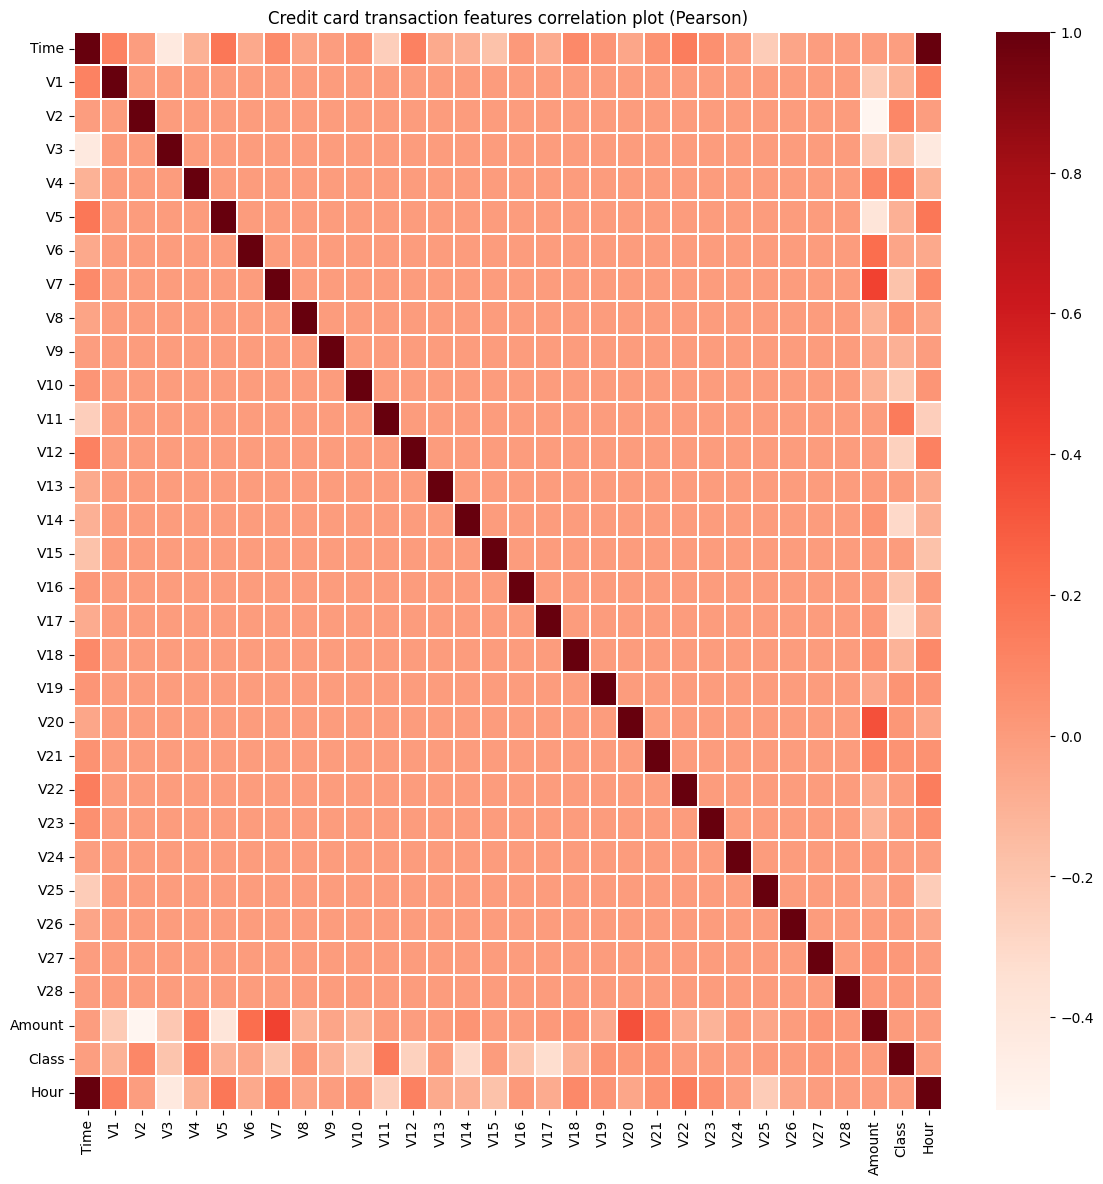

In [22]:
plt.figure(figsize=(14,14))
plt.title('Credit card transaction features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 0.1, cmap = 'Reds')
plt.show()

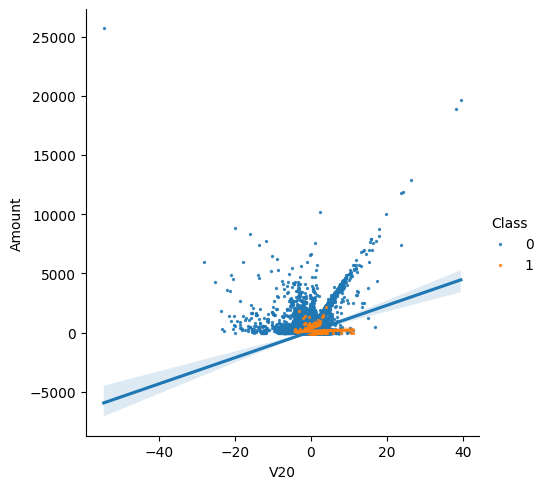

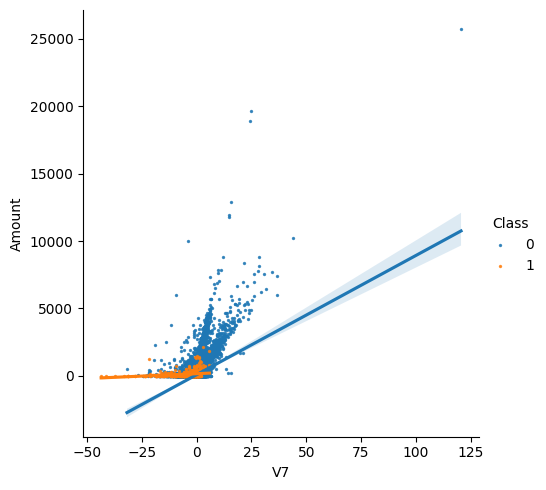

In [23]:
s = sns.lmplot(x = 'V20', y = 'Amount', data = df , hue = 'Class', fit_reg= True, scatter_kws = {'s':2})
s = sns.lmplot(x = 'V7', y = 'Amount', data = df , hue = 'Class', fit_reg= True, scatter_kws = {'s':2})
plt.show()

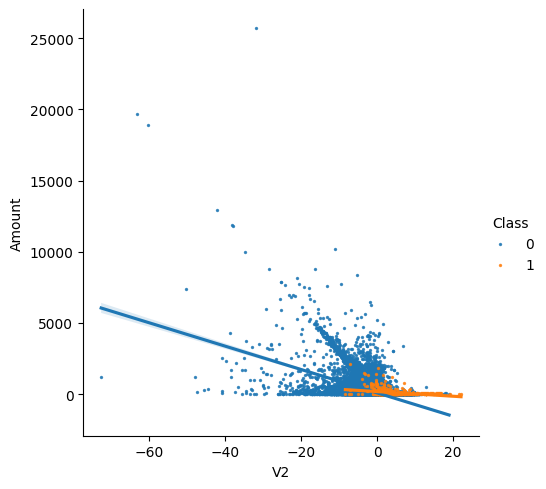

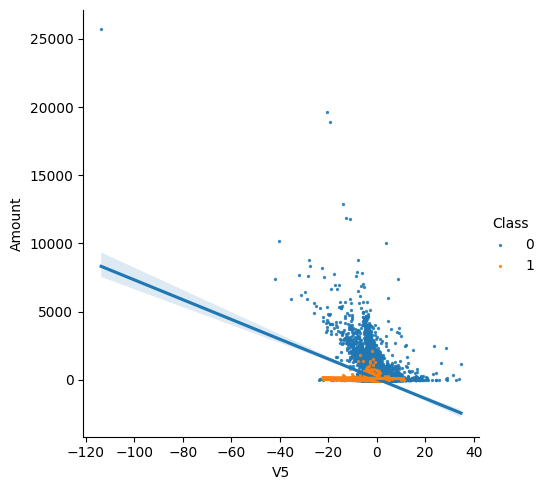

In [24]:
s = sns.lmplot(x = 'V2', y = 'Amount', data = df, hue = 'Class', fit_reg = True, scatter_kws = {'s':2} )
s = sns.lmplot(x = 'V5', y = 'Amount', data = df, hue = 'Class', fit_reg = True, scatter_kws = {'s':2} )
plt.show()

<ipython-input-25-5d13b86625df>:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-25-5d13b86625df>:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-25-5d13b86625df>:14: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-25-5d13b86625df>:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameter

<Figure size 640x480 with 0 Axes>

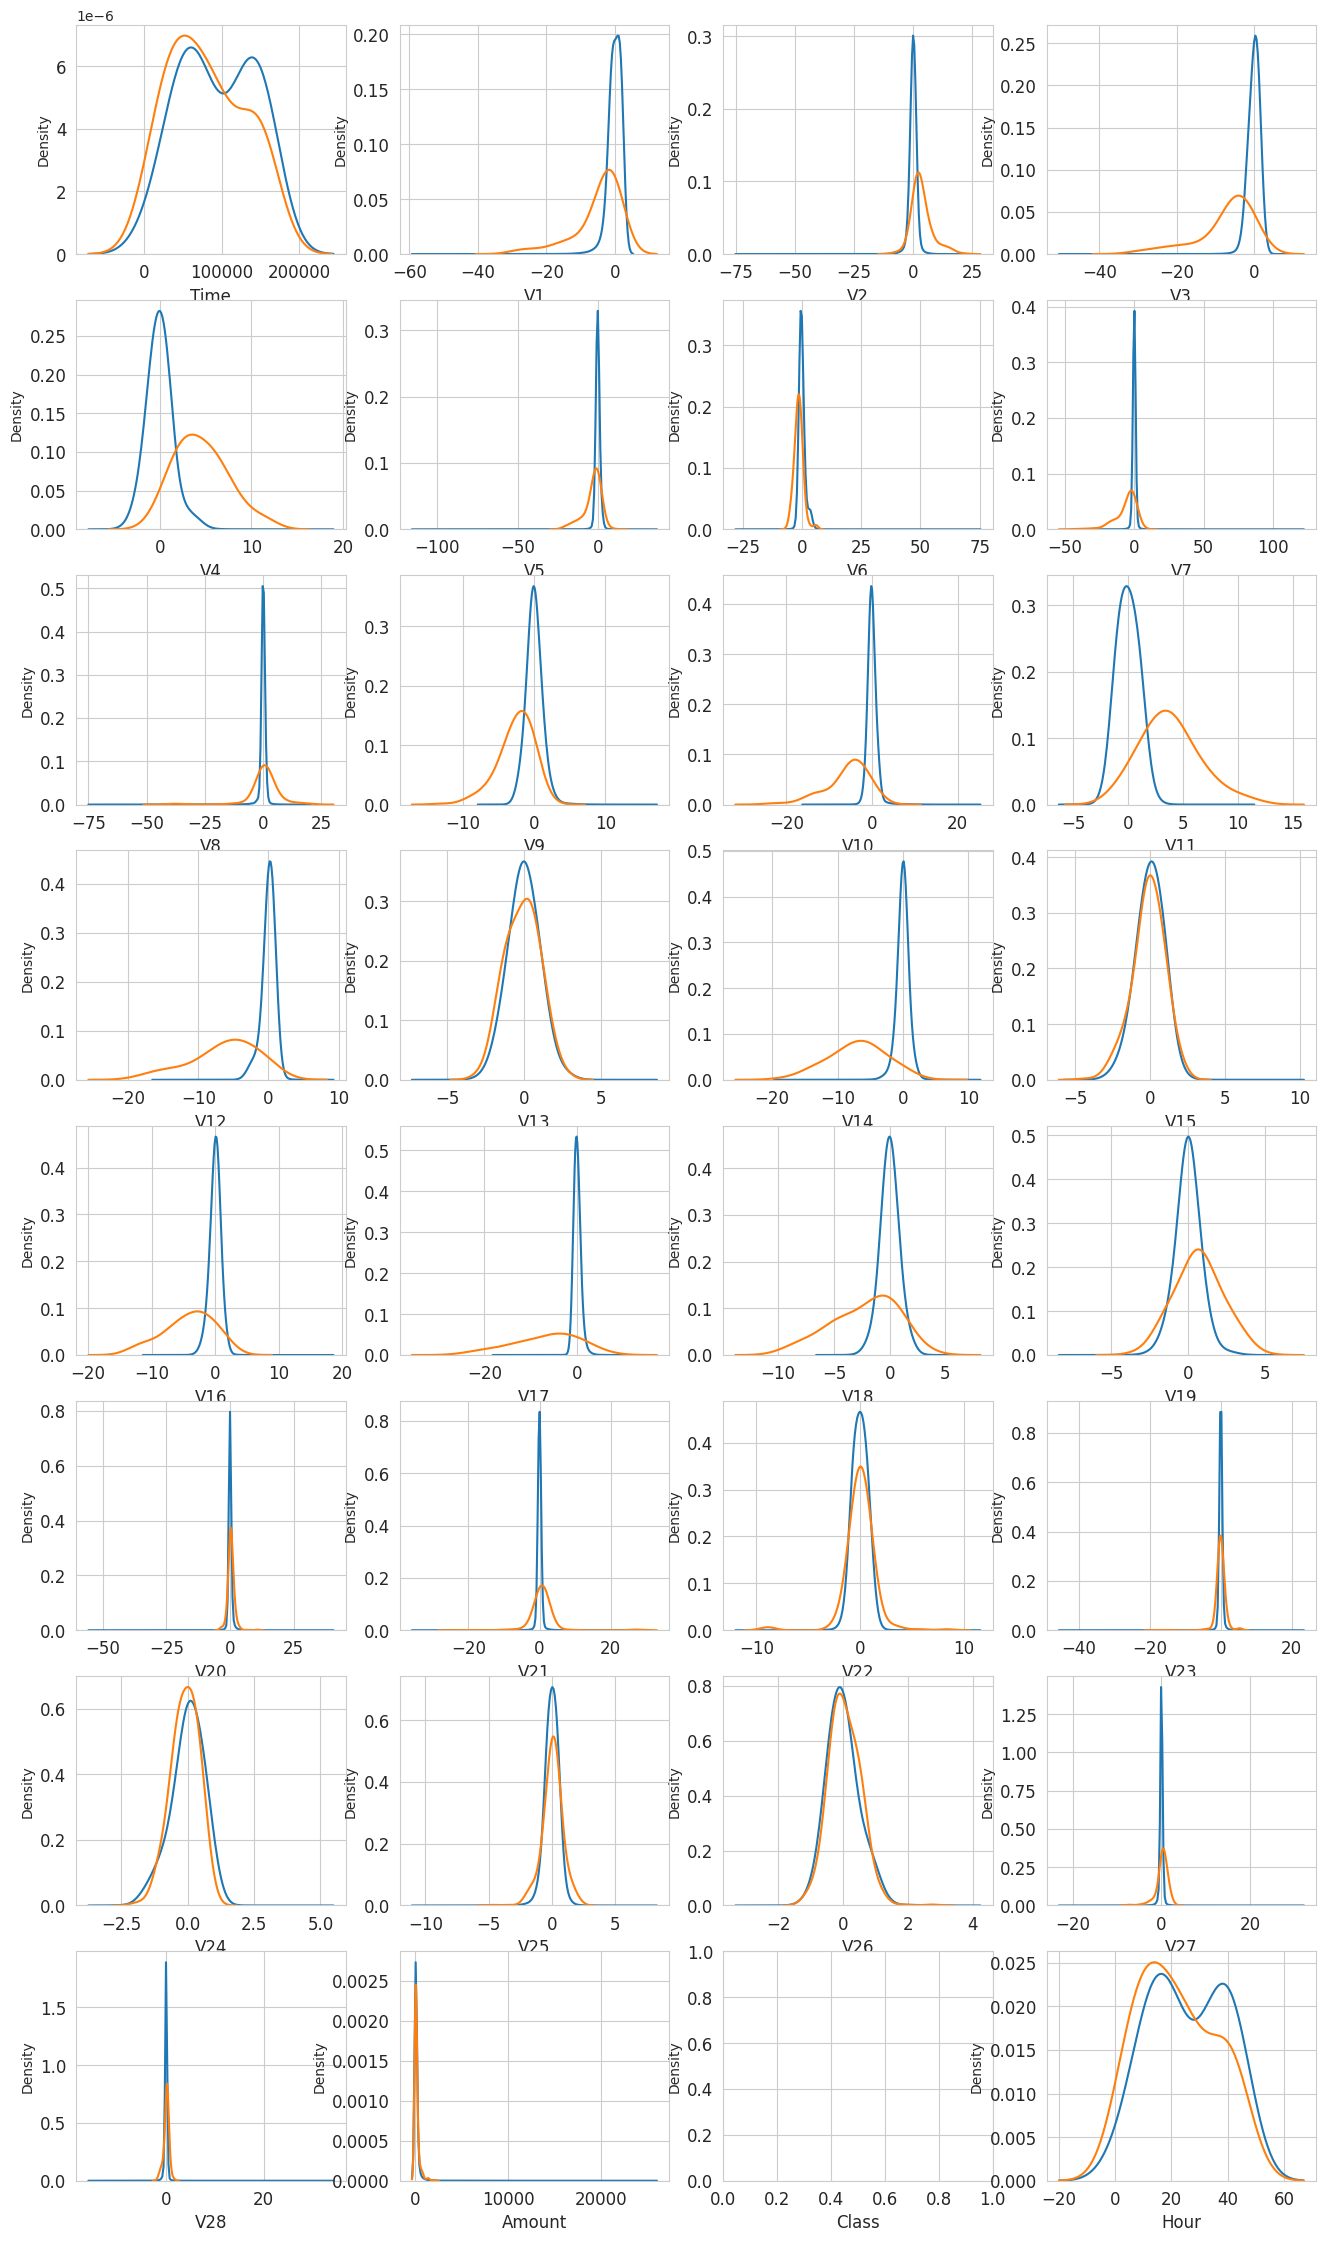

In [25]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class']==0]
t1 = df.loc[df['Class']==1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
  i +=1
  plt.subplot(8,4,i)
  sns.kdeplot(t0[feature], bw = 0.5, label = 'Class = 0')
  sns.kdeplot(t1[feature], bw = 0.5, label = 'Class = 1')
  plt.xlabel(feature, fontsize=12)
  locs, labels = plt.xticks()
  plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

In [26]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [27]:
train_df, test_df = train_test_split(df, test_size = TEST_SIZE, random_state = RANDOM_STATE, shuffle = True)
train_df, valid_df = train_test_split(df, test_size = VALID_SIZE, random_state = RANDOM_STATE, shuffle = True)

In [28]:
clf = RandomForestClassifier(n_jobs = NO_JOBS, random_state = RANDOM_STATE,
                             criterion = RFC_METRIC, n_estimators = NUM_ESTIMATORS, verbose = False)

In [29]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [30]:
preds = clf.predict(valid_df[predictors])

<ipython-input-31-fc20feb07d4b>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



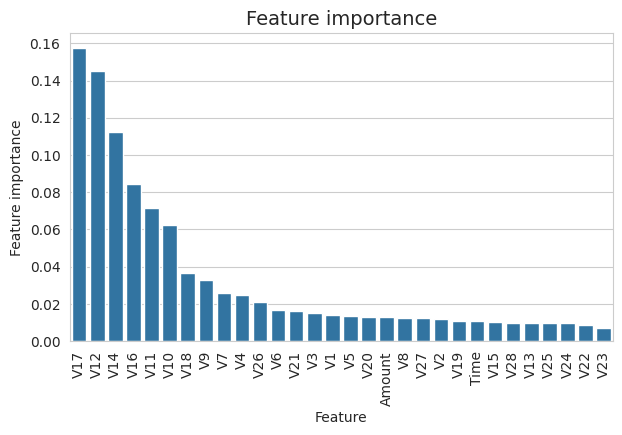

In [31]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature importance', ascending = False)
plt.figure(figsize = (7, 4))
plt.title('Feature importance', fontsize = 14)
s = sns.barplot(x = 'Feature', y = 'Feature importance', data= tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

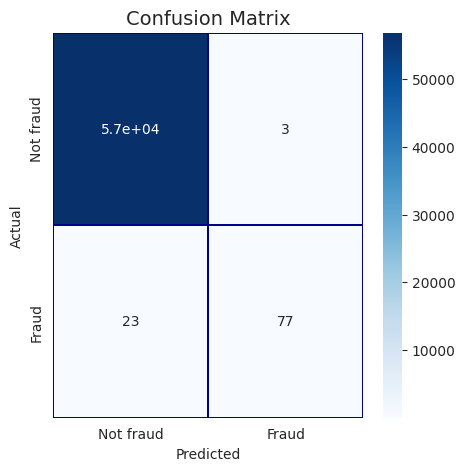

In [32]:
cm = pd.crosstab(valid_df[target].values, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize = (5,5))
sns.heatmap(cm, xticklabels = ['Not fraud', 'Fraud'], yticklabels=['Not fraud', 'Fraud'],
            annot = True, ax = ax1, linewidths = .2, linecolor = 'Darkblue', cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

In [33]:
roc_auc_score(valid_df[target].values, preds)

0.8849736203439907

In [34]:
clf = AdaBoostClassifier(random_state = RANDOM_STATE, algorithm = 'SAMME.R', learning_rate = 0.8, n_estimators = NUM_ESTIMATORS)

In [35]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [36]:
preds = clf.predict(valid_df[predictors])

<ipython-input-37-6cd84baaa54d>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



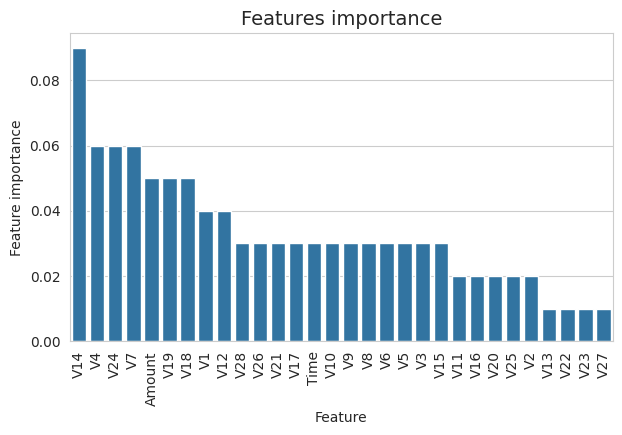

In [37]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature importance', ascending = False)
plt.figure(figsize = (7,4))
plt.title('Features importance', fontsize = 14)
s = sns.barplot(x = 'Feature', y = 'Feature importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

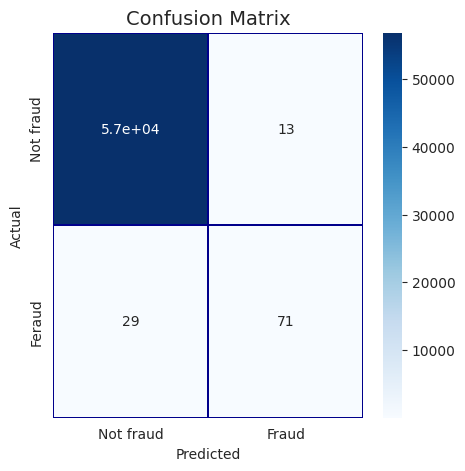

In [38]:
cm = pd.crosstab(valid_df[target].values, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig , ax1 = plt.subplots(ncols = 1, figsize = (5, 5))
sns.heatmap(cm, xticklabels = ['Not fraud', 'Fraud'], yticklabels = ['Not fraud', 'Feraud'],
            annot = True, ax = ax1, linewidths = .2, linecolor = 'Darkblue', cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

In [39]:
roc_auc_score(valid_df[target].values, preds)

0.8548856881572932

In [40]:
clf = CatBoostClassifier(iterations = 500, learning_rate = 0.02, depth = 12,
                         eval_metric = 'AUC', random_seed = RANDOM_STATE,
                         bagging_temperature = 0.2, od_type = 'Iter',
                         metric_period = VERBOSE_EVAL, od_wait = 100)
# CatBoost is a gradient boosting library that is particularly effective with categorical features.
# iterations: This parameter specifies the number of boosting iterations (trees) to be built. Increasing the number of iterations generally improves model performance but also increases computational cost.
# learning_rate: This parameter controls the step size at each iteration of the boosting process. A smaller learning rate makes the model more robust but requires more iterations to converge.
# depth: This parameter specifies the maximum depth of the trees in the ensemble. Deeper trees can capture more complex patterns in the data but are also more prone to overfitting.
# eval_metric: This parameter specifies the evaluation metric to be used during training. Here, it's set to 'AUC', which stands for Area Under the ROC Curve, a common metric for binary classification models.
# bagging_temperature: This parameter controls the randomness in the bagging process. A lower value leads to less randomness, while a higher value leads to more randomness.
# od_type: This parameter specifies the type of early stopping strategy to be used. Here, it's set to 'Iter', which means the model will stop training when the specified number of iterations (od_wait) without improvement is reached.
# metric_period: This parameter specifies how often (in iterations) the evaluation metric should be computed and displayed during training.
# od_wait: This parameter specifies the number of iterations to wait for improvement before stopping the training process.

In [41]:
clf.fit(train_df[predictors], train_df[target].values, verbose = True)

0:	total: 1.28s	remaining: 10m 37s
50:	total: 41.9s	remaining: 6m 8s
100:	total: 1m 42s	remaining: 6m 44s
150:	total: 2m 17s	remaining: 5m 18s
200:	total: 2m 51s	remaining: 4m 15s
250:	total: 3m 25s	remaining: 3m 24s
300:	total: 3m 59s	remaining: 2m 38s
350:	total: 4m 35s	remaining: 1m 57s
400:	total: 5m 18s	remaining: 1m 18s
450:	total: 5m 55s	remaining: 38.7s
499:	total: 6m 29s	remaining: 0us


In [42]:
preds = clf.predict(valid_df[predictors])

<ipython-input-43-65ca99db8072>:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



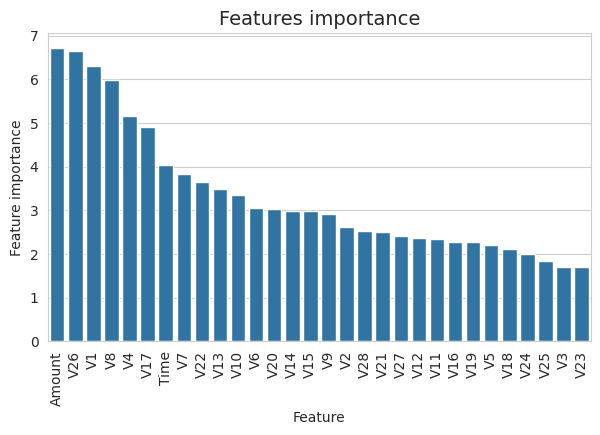

In [43]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by = 'Feature importance', ascending = False)
plt.figure(figsize=(7,4))
plt.title('Features importance', fontsize = 14)
s = sns.barplot(x = 'Feature', y= 'Feature importance', data = tmp)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

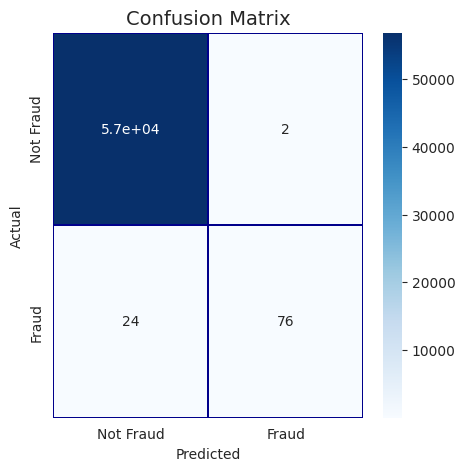

In [44]:
cm = pd.crosstab(valid_df[target].values, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize = (5,5))
sns.heatmap(cm, xticklabels = ['Not Fraud', 'Fraud'], yticklabels = ['Not Fraud', 'Fraud'],
            annot = True, ax = ax1, linewidths = .2, linecolor = 'Darkblue', cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

In [45]:
roc_auc_score(valid_df[target].values, preds)

0.8799824135626606

In [46]:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)
# DMatrix is a class from the XGBoost library used to represent a dataset for training or prediction. It is optimized for memory efficiency and speed.
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
params = {}
# set xgboost parameters
params['objective'] = 'binary:logistic' # This sets the objective function for the XGBoost model. 'binary:logistic' indicates that the model will be trained for binary classification, and the output will be the probability of the positive class.
params['eta'] = 0.039 # This parameter controls the learning rate of the XGBoost model. It determines the step size at each iteration during the gradient descent process. Lower values typically result in slower learning but potentially better convergence.
params['silent'] = True # This parameter controls whether XGBoost prints messages during training. Setting it to True suppresses the output of training progress.
params['max_depth'] = 2 # This sets the maximum depth of each decision tree in the XGBoost ensemble. A lower max_depth value limits the complexity of the trees and helps prevent overfitting.
params['subsample'] = 0.8 # This parameter specifies the fraction of samples to be randomly selected for each tree during training. A value of 0.8 indicates that 80% of the training data will be used to train each tree.
params['colsample_bytree'] = 0.9 # This parameter specifies the fraction of features to be randomly selected for each tree during training. A value of 0.9 indicates that 90% of the features will be considered for splitting at each tree node.
params['eval_metric'] = 'auc' # This sets the evaluation metric used to assess the model's performance during training. 'auc' stands for Area Under the ROC Curve, a common metric for binary classification tasks.
params['random_state'] = RANDOM_STATE # This sets the random seed for reproducibility. By setting a random seed, you ensure that the model's behavior is consistent across different runs.

In [47]:
model = xgb.train(params, dtrain, MAX_ROUNDS, watchlist, early_stopping_rounds = EARLY_STOP,
                  maximize = True, verbose_eval = VERBOSE_EVAL)
# params: This parameter specifies the parameters/configurations for the XGBoost model. It is a dictionary containing various settings such as learning rate, maximum depth, and evaluation metric.
# dtrain: This parameter is the training dataset represented as a DMatrix object. It contains the features and corresponding target values used for training the model.
# watchlist: This parameter is an optional watchlist used for monitoring the model's performance during training. It typically contains tuples of (DMatrix, label) pairs for different datasets (e.g., training and validation sets).
# maximize: This parameter specifies whether to maximize or minimize the evaluation metric. Setting it to True indicates that the goal is to maximize the metric (e.g., AUC).

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:727: FutureWarning:

Pass `evals` as keyword args.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:10:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.




[0]	train-auc:0.92658	valid-auc:0.91900
[50]	train-auc:0.92747	valid-auc:0.91880
[54]	train-auc:0.92852	valid-auc:0.91857


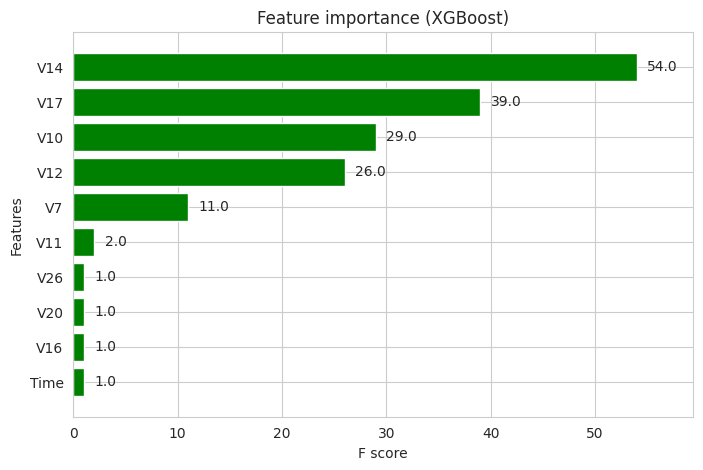

In [48]:
fig, (ax) = plt.subplots(ncols = 1, figsize = (8, 5))
xgb.plot_importance(model, height = 0.8, title = 'Feature importance (XGBoost)', ax= ax, color='green')
plt.show()

In [49]:
preds = model.predict(dtest)

In [50]:
roc_auc_score(test_df[target].values, preds)

0.9185672329499489

In [51]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # should be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced
         }
# boosting_type: specifies the boosting type to be used. 'gbdt' stands for Gradient Boosting Decision Trees. Other options include 'dart' and 'goss'.
# objective: defines the objective function to be optimized during training. 'binary' indicates binary classification. The model aims to optimize binary classification loss functions.
# metric: specifies the evaluation metric to be used during training. 'auc' indicating that the Area Under the ROC Curve will be used to evaluate the model's performance.
# learning_rate: controls the step size at each iteration of the boosting process. A lower learning rate makes the model more robust but requires more iterations to converge.
# num_leaves: specifies the maximum number of leaves in each decision tree. Increasing num_leaves makes the model more expressive but may lead to overfitting.
# max_depth: sets the maximum depth of each decision tree. A smaller value restricts the complexity of the trees, reducing the risk of overfitting.
# min_child_samples: specifies the minimum number of samples required to create a new split in a node. It helps prevent overfitting by controlling the number of samples in each leaf.
# max_bin: sets the maximum number of bins to bucket continuous features. A larger value increases model complexity but may improve accuracy.
# subsample: specifies the fraction of samples to be used for training each tree. It helps reduce overfitting by randomly sampling a subset of the data.
# subsample_freq: controls the frequency of subsampling. It specifies how often subsampling will be applied during training.
# colsample_bytree: specifies the fraction of features to be used for training each tree. It helps introduce randomness and reduces overfitting.
# min_child_weight: specifies the minimum sum of instance weights (hessian) needed in a child. It helps control overfitting by regularizing the tree growth.
# min_split_gain: specifies the minimum gain required to make a new split. It helps prevent overfitting by controlling the minimum improvement in loss needed to make a split.
# nthread: specifies the number of threads to be used for training. It enables parallelism and speeds up training by utilizing multiple CPU cores.
# verbose: controls the verbosity of training output. Setting it to 0 suppresses the output of training progress.
# scale_pos_weight: balances the positive and negative weights, especially useful for imbalanced classification tasks. It helps prevent the model from being biased towards the majority class.

In [52]:
dtrain = lgb.Dataset(train_df[predictors].values,
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

In [53]:
evals_results = {}

model = lgb.train(params,
                  dtrain,
                  valid_sets=[dtrain, dvalid],
                  valid_names=['train','valid'],
                  evals_result=evals_results,
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=2*EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL,
                  feval=None)

# params: specifies the parameters/configurations for the LightGBM model. It is a dictionary containing various settings such as boosting type, objective function, learning rate, and evaluation metric.
# valid_sets: specifies the validation datasets to be used during training. It is a list containing Dataset objects representing the training and validation datasets.
# valid_names: specifies the names of the validation datasets provided in valid_sets. It is a list containing strings representing the names of the datasets, such as 'train' and 'valid'.
# evals_result: an optional dictionary used to store the evaluation results during training. It will contain the evaluation metrics computed on the validation datasets for each boosting round.
# num_boost_round: specifies the maximum number of boosting rounds (iterations) for training the model. The model will continue training until this maximum number of rounds is reached or until early stopping conditions are met.
# early_stopping_rounds: specifies the number of rounds with no improvement to trigger early stopping. If the evaluation metric on the validation dataset does not improve for early_stopping_rounds consecutive rounds, training will stop early.
# verbose_eval: controls the verbosity of training output. It specifies how often (in terms of boosting rounds) to print training progress messages.
# feval: an optional custom evaluation function. It allows you to define a custom evaluation metric to be used during training.

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:240: UserWarning:

'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:261: UserWarning:

'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074796 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.996302	valid's auc: 0.944272
[100]	train's auc: 0.99779	valid's auc: 0.930541
Early stopping, best iteration is:
[7]	train's auc: 0.981017	valid's auc: 0.949256


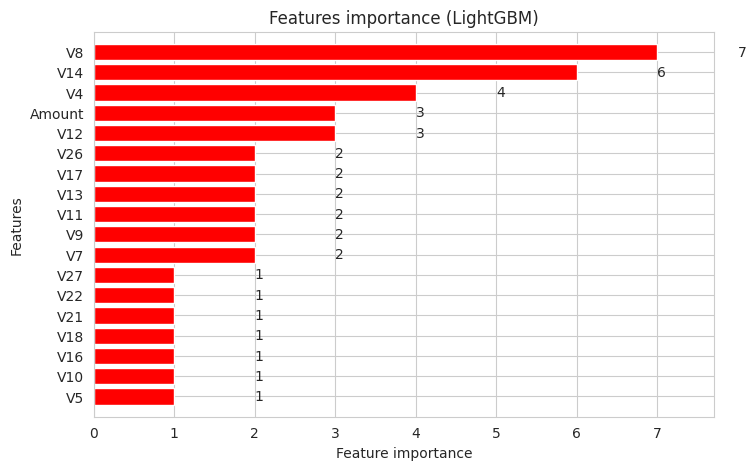

In [54]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red")
plt.show()

In [55]:
preds = model.predict(test_df[predictors])

In [56]:
roc_auc_score(test_df[target].values, preds)

0.9489393619640532

In [57]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
for train_idx, valid_idx in kf.split(train_df):
  train_x, train_y = train_df[predictors].iloc[train_idx], train_df[target].iloc[train_idx]
  valid_x, valid_y = train_df[predictors].iloc[valid_idx], train_df[target].iloc[valid_idx]
  evals_results = {}
  model = LGBMClassifier(nthread = -1, n_estimators = 2000, learning_rate = 0.01, num_leaves = 80,
                         colsample_bytree = 0.98, subsample = 0.78, reg_alpha = 0.04, reg_lambda = 0.073,
                         subsample_for_bin = 50, boosting_type = 'gbdt', is_unbalance = False, min_split_gain = 0.025,
                         min_child_weight = 40, min_child_samples = 510, objective = 'binary', metric = 'auc',
                         silent = -1, verbose = -1, feval = None)
  model.fit(train_x, train_y, eval_set = [(train_x, train_y), (valid_x, valid_y)], eval_metric = 'auc',
            verbose = VERBOSE_EVAL, early_stopping_rounds = EARLY_STOP)
  oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration = model.best_iteration_)[:,1]
  test_preds += model.predict_proba(test_df[predictors], num_iteration = model.best_iteration_)[:,1]/kf.n_splits

  fold_importance_df = pd.DataFrame()
  fold_importance_df['feature'] = predictors
  fold_importance_df['importance'] = clf.feature_importances_
  fold_importance_df['fold'] = n_fold +1

  feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis= 0)
  print('Fold %2d AUC: %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
  del model, train_x, train_y, valid_x, valid_y
  gc.collect()
  n_fold = n_fold + 1
  train_auc_score = roc_auc_score(train_df[target], oof_preds)
  print('Full AUC score %.6f' % train_auc_score)

# kf = KFold(n_splits=NUMBER_KFOLDS, random_state=RANDOM_STATE, shuffle=True): This initializes k-fold cross-validation with NUMBER_KFOLDS folds. The dataset will be split into NUMBER_KFOLDS folds, and the splitting process is randomized due to shuffle=True.
# oof_preds = np.zeros(train_df.shape[0]): This initializes an array of zeros with the length of the training dataset. It will store the out-of-fold predictions.
# test_preds = np.zeros(test_df.shape[0]): This initializes an array of zeros with the length of the test dataset. It will store the predictions on the test dataset.
# feature_importance_df = pd.DataFrame(): This initializes an empty DataFrame to store feature importances calculated during each fold of cross-validation.
# n_fold = 0: This variable keeps track of the current fold number.
# The for loop iterates over each fold generated by kf.split(train_df). For each fold:
# The training and validation indices are extracted from the fold split.
# A LightGBM model (LGBMClassifier) is initialized with specified hyperparameters.
# The model is trained on the training data and evaluated on both the training and validation sets. The eval_set parameter specifies the datasets for evaluation during training.
# Out-of-fold predictions are computed for the validation set (oof_preds) and added to the overall predictions.
# Predictions are also made on the test dataset and added to test_preds.
# Feature importances for the fold are calculated and stored in fold_importance_df.
# Evaluation metrics (AUC) for the fold are printed.
# Model, data, and unnecessary variables are deleted to free up memory.
# n_fold is incremented.
# After all folds are processed, the full AUC score of the model on the training dataset is printed.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[50]	training's auc: 0.971662	valid_1's auc: 0.971608
Fold  1 AUC: 0.981840
Full AUC score 0.555216
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[50]	training's auc: 0.960089	valid_1's auc: 0.978609
Fold  2 AUC: 0.979296
Full AUC score 0.593876
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[50]	training's auc: 0.972474	valid_1's auc: 0.98916
[100]	training's auc: 0.973951	valid_1's auc: 0.991053
Fold  3 AUC: 0.991758
Full AUC score 0.674337
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[50]	training's auc: 0.97881	valid_1's auc: 0.950556
[100]	training's auc: 0.978461	valid_1's auc: 0.954802
Fold  4 AUC: 0.956518
Full AUC score 0.776986
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:598: UserWarning:

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[50]	training's auc: 0.977961	valid_1's auc: 0.975465
Fold  5 AUC: 0.979401
Full AUC score 0.929175


In [58]:
pred = test_preds